In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import os
import math
import matplotlib as mlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
#loading the data
mathstudy='studentmat.csv'
mathstudy = pd.read_csv(mathstudy, sep=';', header=None, names=['school','sex','age','address','family size','Parent status','Mother edu','Father edu','Mother job','Father job','reason for school','guardian','travel time','study time','past failures','school support','family support','extra paid classes','activities','attended nursery','wants higher','internet access','romantic rship','fam relation qual','free time','going out','workday alcohol','Weekend alcohol','current health','absences','1st Period Grades','2nd Period Grades','Final Grades'])
mathstest=mathstudy.copy()
print (mathstest.shape)
print (mathstest.dtypes)

#only keeping the data most relevant to the task and deleting rest of the columns and rows
mathstest.drop(mathstest.columns[[0,2,4,8,9,10,11,12,19,22,24,25,27,30,31]], axis=1, inplace =True)
mathstest.drop([0], axis=0, inplace=True)

#inspecting the data for any anomalies and changing the labels for an easy understanding
#sex of student
mathstest['sex'].replace('F', 'Female', inplace=True)
mathstest['sex'].replace('M', 'Male', inplace=True)
mathstest['sex'].value_counts()
#address of student(either urban or rural)
mathstest['address'].value_counts()
mathstest['address'].replace('U', 'Urban', inplace=True)
mathstest['address'].replace('R', 'Rural', inplace=True)
mathstest['address'].index
#marital status of parents
mathstest['Parent status'].value_counts()
mathstest['Parent status'].replace('T','Together', inplace = True)
mathstest['Parent status'].replace('A','Separated', inplace = True)
mathstest['Parent status'].value_counts()
#highest education attained by mother
mathstest['Mother edu'].value_counts()
mathstest['Mother edu'].replace('0', 'None', inplace=True)
mathstest['Mother edu'].replace('1', 'Primary', inplace=True)
mathstest['Mother edu'].replace('2', '5th to 9th', inplace=True)
mathstest['Mother edu'].replace('3', 'Secondary', inplace=True)
mathstest['Mother edu'].replace('4', 'Higher', inplace=True)
mathstest['Mother edu'].describe
#highest education attained by father
mathstest['Father edu'].value_counts()
mathstest['Father edu'].replace('0', 'None', inplace=True)
mathstest['Father edu'].replace('1', 'Primary', inplace=True)
mathstest['Father edu'].replace('2', '5th to 9th', inplace=True)
mathstest['Father edu'].replace('3', 'Secondary', inplace=True)
mathstest['Father edu'].replace('4', 'Higher', inplace=True)
#weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours))
mathstest['study time'].value_counts()
#number of past class failures (n if 1<=n<3, else 0)
mathstest['past failures'].value_counts()
#extra educational support
mathstest['school support'].value_counts()
#family educational support
mathstest['family support'].value_counts()
#extra paid classes within the subject
mathstest['extra paid classes'].value_counts()
#extra curricular activities
mathstest['activities'].value_counts()
#wants to take higher education
mathstest['wants higher'].value_counts()
#internet access at home
mathstest['internet access'].value_counts()
#quality of family relationships(1 - very bad to 5 - excellent)
mathstest['fam relation qual'].value_counts()
#workday alcohol consumption(1 - very low to 5 - very high)
mathstest['workday alcohol'].value_counts()
#current health status (from 1 - very bad to 5 - very good)
mathstest['current health'].value_counts()
#number of school absences
mathstest['absences'].value_counts()
#final grade
mathstest['Final Grades'].value_counts()
#final checking of the entire dataset
print(mathstest.describe())


(396, 33)
school                object
sex                   object
age                   object
address               object
family size           object
Parent status         object
Mother edu            object
Father edu            object
Mother job            object
Father job            object
reason for school     object
guardian              object
travel time           object
study time            object
past failures         object
school support        object
family support        object
extra paid classes    object
activities            object
attended nursery      object
wants higher          object
internet access       object
romantic rship        object
fam relation qual     object
free time             object
going out             object
workday alcohol       object
Weekend alcohol       object
current health        object
absences              object
1st Period Grades     object
2nd Period Grades     object
Final Grades          object
dtype: object
           sex addr

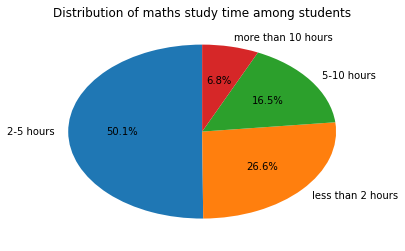

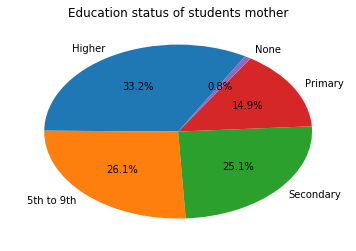

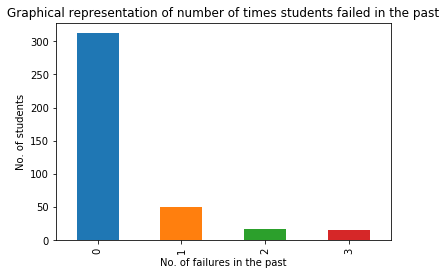

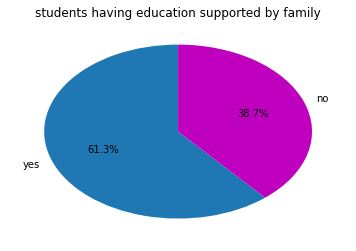

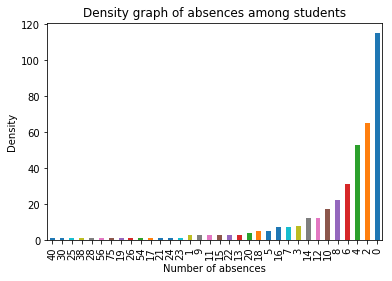

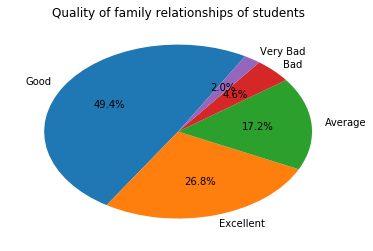

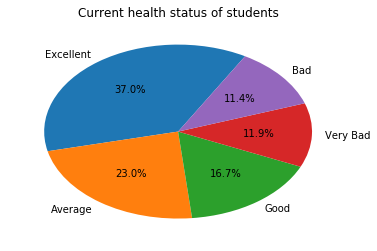

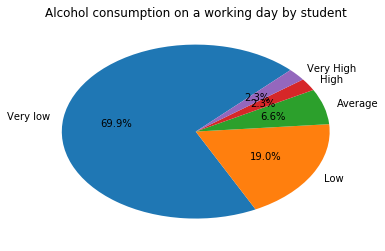

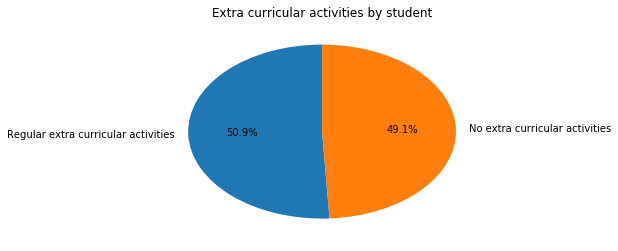

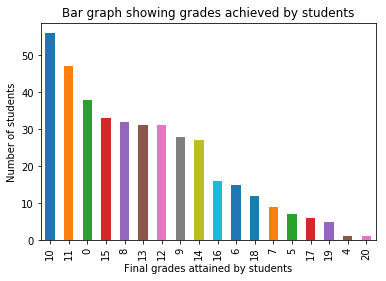

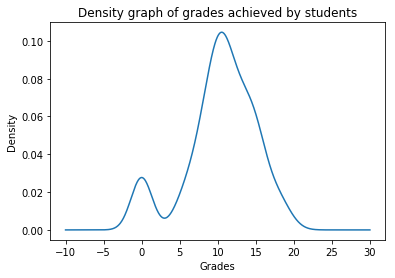

In [3]:
#exploring the data through graphs
#pie chart showing distribution of maths study time
times= ['2-5 hours', 'less than 2 hours', '5-10 hours', 'more than 10 hours']
plt.pie(mathstest['study time'].value_counts(), labels = times, autopct = '%.1f%%', startangle = 90)
plt.title('Distribution of maths study time among students')
plt.show()

#Students' mothers' education status
plt.pie(mathstest['Mother edu'].value_counts(), labels=['Higher','5th to 9th', 'Secondary', 'Primary', 'None'], startangle=60, autopct='%.1f%%')
plt.title('Education status of students mother')
plt.show()

#Number of times student failed in the past
mathstest['past failures'].value_counts().plot(kind='bar')
plt.xlabel('No. of failures in the past')
plt.ylabel('No. of students')
plt.title('Graphical representation of number of times students failed in the past')
plt.show()

#pie graph showing percentage of education supported by family
plt.pie(mathstest['family support'].value_counts(), labels=['yes', 'no'], startangle=90, autopct='%.1f%%', colors=['C0','m'])
plt.title('students having education supported by family')
plt.show()

#bar graph showing absence among students
mathstest['absences'].value_counts().plot(kind='bar').invert_xaxis()  
plt.xlabel('Number of absences')
plt.ylabel('Density')
plt.title('Density graph of absences among students')
plt.show()

#pie graph showing students' relationship with their family
plt.pie(mathstest['fam relation qual'].value_counts(), labels=['Good', 'Excellent', 'Average', 'Bad', 'Very Bad'], startangle=60, autopct='%.1f%%')
plt.title('Quality of family relationships of students')
plt.show()

#pie graph showing current health status of students
plt.pie(mathstest['current health'].value_counts(), labels=['Excellent', 'Average', 'Good', 'Very Bad', 'Bad'], startangle=60, autopct='%.1f%%')
plt.title('Current health status of students')
plt.show()

#Average alcohol consumption on a weekday
plt.pie(mathstest['workday alcohol'].value_counts(), labels=['Very low', 'Low', 'Average', 'High', 'Very High'], startangle=45, autopct='%.1f%%')
plt.title('Alcohol consumption on a working day by student')
plt.show()

#Extra curricular activities done by students
plt.pie(mathstest['activities'].value_counts(), labels=['Regular extra curricular activities', 'No extra curricular activities'], startangle=90, autopct='%.1f%%')
plt.title('Extra curricular activities by student')
plt.show()

# final grade distribution among students
mathstest['Final Grades'].value_counts().plot(kind='bar')
plt.xlabel('Final grades attained by students')
plt.ylabel('Number of students')
plt.title('Bar graph showing grades achieved by students')
plt.show()

#density graph showing the final grades achieved
mathstest['Final Grades']=mathstest['Final Grades'].astype('int64')
mathstest["Final Grades"].plot(kind='density')
plt.xlabel("Grades")
plt.title("Density graph of grades achieved by students")
plt.show()


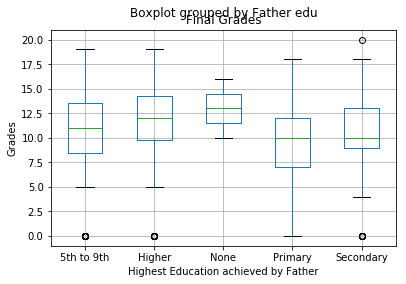

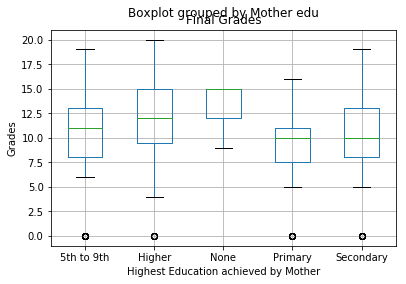

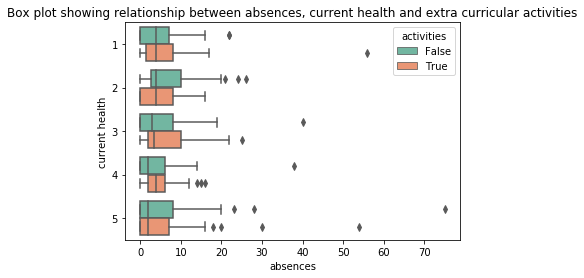

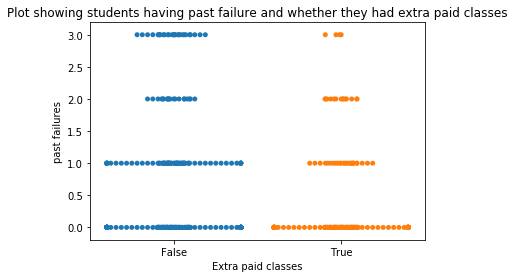

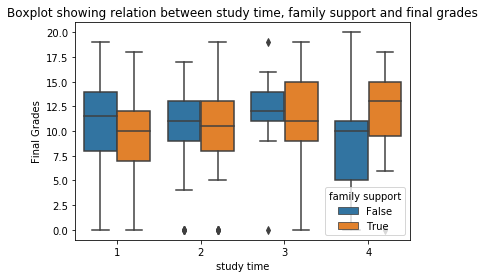

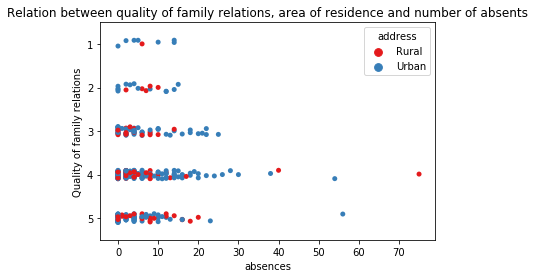

In [4]:
#converting all the datatypes for easier plotting of graphs
mathstest['sex']=mathstest['sex'].astype('category')
mathstest['address']=mathstest['address'].astype('category')
mathstest['Parent status']=mathstest['Parent status'].astype('category')
mathstest['Father edu']=mathstest['Father edu'].astype('category')
mathstest['Mother edu']=mathstest['Mother edu'].astype('category')
mathstest['study time']=mathstest['study time'].astype('category')
mathstest['past failures']=mathstest['past failures'].astype('int64')
mathstest['fam relation qual']=mathstest['fam relation qual'].astype('category')
mathstest['workday alcohol']=mathstest['workday alcohol'].astype('category')
mathstest['current health']=mathstest['current health'].astype('category')
mathstest['absences']=mathstest['absences'].astype('int64')
mathstest['Final Grades']=mathstest['Final Grades'].astype('int64')
mathstest['school support']=mathstest['school support'].map({'no':False, 'yes':True})
mathstest['family support']=mathstest['family support'].map({'no':False, 'yes':True})
mathstest['extra paid classes']=mathstest['extra paid classes'].map({'no':False, 'yes':True})
mathstest['activities']=mathstest['activities'].map({'no':False, 'yes':True})
mathstest['wants higher']=mathstest['wants higher'].map({'no':False, 'yes':True})
mathstest['internet access']=mathstest['internet access'].map({'no':False, 'yes':True})


#comparison between different attributes
#parents education with final grades
mathstest.boxplot(column="Final Grades", by="Father edu")
plt.xlabel("Highest Education achieved by Father")
plt.ylabel("Grades")
plt.show()

mathstest.boxplot(column="Final Grades", by="Mother edu")
plt.xlabel("Highest Education achieved by Mother")
plt.ylabel("Grades")
plt.show()

#current health status with absences, current health and extra curricular activities
sort_abs=mathstest.sort_values('absences')
ax=sns.boxplot(x='absences', y='current health', hue='activities',data=sort_abs, palette='Set2')
ax.set_title("Box plot showing relationship between absences, current health and extra curricular activities")
plt.show()

#past failures with extra paid classes
ap=sns.stripplot(x='extra paid classes', y = 'past failures', data =mathstest)
ap=sns.swarmplot(x='extra paid classes', y = 'past failures', data =mathstest)
ap.set_xlabel("Extra paid classes")
ap.set_title("Plot showing students having past failure and whether they had extra paid classes")
plt.show()

#study time with final grades and family support
an=sns.boxplot(x='study time', y = 'Final Grades', hue = 'family support', data =mathstest)
an.set_title("Boxplot showing relation between study time, family support and final grades")
plt.show()

#address with family quality relationship and absences
aq=sns.stripplot(x='absences', y='fam relation qual', hue = 'address', data=mathstest, palette='Set1')
aq.set_title("Relation between quality of family relations, area of residence and number of absents")
aq.set_ylabel("Quality of family relations")
plt.show()


In [5]:
#conversion of categorical values to int for scikitlearning
mathstest['Parent status'].replace({"Together":1, "Separated" : 0}, inplace=True)
mathstest['Mother edu'].replace({"Higher":4, "Primary":1, "Secondary":3, "5th to 9th":2, "None":0}, inplace=True)
mathstest['Father edu'].replace({"Higher":4, "Primary":1, "Secondary":3, "5th to 9th":2, "None":0}, inplace=True)
mathstest['sex'].replace({"Female":0, "Male":1}, inplace=True)
mathstest['address'].replace({"Urban":0, "Rural":1}, inplace=True)
mathstest['sex']=mathstest['sex'].real.astype('int64')
mathstest['address']=mathstest['address'].astype('int64')
mathstest['Parent status']=mathstest['Parent status'].astype('int64')
mathstest['Father edu']=mathstest['Father edu'].astype('int64')
mathstest['Mother edu']=mathstest['Mother edu'].astype('int64')
mathstest['study time']=mathstest['study time'].astype('int64')
mathstest['past failures']=mathstest['past failures'].astype('int64')
mathstest['fam relation qual']=mathstest['fam relation qual'].astype('int64')
mathstest['workday alcohol']=mathstest['workday alcohol'].astype('int64')
mathstest['current health']=mathstest['current health'].astype('int64')
mathstest['absences']=mathstest['absences'].astype('int64')

#converting Final Grades to pass and fail result column and dropping the original(where >=10 is pass)
mathstest['PassResult']=np.where(mathstest['Final Grades']>9, '1', '0')
mathstest = mathstest.drop('Final Grades', 1)

In [6]:
#Decision Tree Classifier
#for 50% split
clf=DecisionTreeClassifier()
cols=['Mother edu', 'Father edu','study time','past failures', 'school support', 'family support','activities', 'wants higher', 'internet access', 'fam relation qual', 'workday alcohol', 'absences']
X=mathstest[cols]
y=mathstest['PassResult']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.5, random_state=2)
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
Score50 = clf.score(X_train,y_train)
print Score50

#accuracy of model
Acu50 = metrics.accuracy_score(y_test, y_predict)
print Acu50

#confusion matrix
cm50 = confusion_matrix(y_test, y_predict)
print cm50

#classification report
Cr50 = classification_report(y_test, y_predict)
print Cr50

0.9949238578680203
0.6262626262626263
[[33 36]
 [38 91]]
              precision    recall  f1-score   support

           0       0.46      0.48      0.47        69
           1       0.72      0.71      0.71       129

   micro avg       0.63      0.63      0.63       198
   macro avg       0.59      0.59      0.59       198
weighted avg       0.63      0.63      0.63       198



In [7]:
#for 40% split
clf=DecisionTreeClassifier()
cols=['Mother edu', 'Father edu','study time','past failures', 'school support', 'family support','activities', 'wants higher', 'internet access', 'fam relation qual', 'workday alcohol', 'absences']
X=mathstest[cols]
y=mathstest['PassResult']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=2)
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
Score40 = clf.score(X_train,y_train)
print Score40

#accuracy of model
Acu40 = metrics.accuracy_score(y_test, y_predict)
print Acu40

#confusion matrix
cm40 = confusion_matrix(y_test, y_predict)
print cm40

#classification report
Cr40 = classification_report(y_test, y_predict)
print Cr40

0.9957805907172996
0.6139240506329114
[[27 29]
 [32 70]]
              precision    recall  f1-score   support

           0       0.46      0.48      0.47        56
           1       0.71      0.69      0.70       102

   micro avg       0.61      0.61      0.61       158
   macro avg       0.58      0.58      0.58       158
weighted avg       0.62      0.61      0.62       158



In [8]:
#for 20% split
clf=DecisionTreeClassifier()
cols=['Mother edu', 'Father edu','study time','past failures', 'school support', 'family support','activities', 'wants higher', 'internet access', 'fam relation qual', 'workday alcohol', 'absences']
X=mathstest[cols]
y=mathstest['PassResult']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=2)
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
Score20 = clf.score(X_train,y_train)
print Score20

#accuracy of model
Acu20 = metrics.accuracy_score(y_test, y_predict)
print Acu20

#confusion matrix
cm20 = confusion_matrix(y_test, y_predict)
print cm20

#classification report
Cr20 = classification_report(y_test, y_predict)
print Cr20

0.9936708860759493
0.7088607594936709
[[15 10]
 [13 41]]
              precision    recall  f1-score   support

           0       0.54      0.60      0.57        25
           1       0.80      0.76      0.78        54

   micro avg       0.71      0.71      0.71        79
   macro avg       0.67      0.68      0.67        79
weighted avg       0.72      0.71      0.71        79



In [9]:
#K Nearest Neighbour
# To find the value of K to be chosen
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
print math.sqrt(len(y_test))
# k should be 9

clf2=KNeighborsClassifier(n_neighbors=9, p=2, metric='euclidean')
fit=clf2.fit(X_train, y_train)
y_pred=fit.predict(X_test)
print(clf2.score(X_train, y_train))

8.88819441732
0.7151898734177216


C:\Users\asus\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\asus\Anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\asus\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  """


In [10]:
#confusion matrix
cm2=confusion_matrix(y_test, y_pred)
print cm2

#classification report
Cr2 = classification_report(y_test, y_pred)
print Cr2

#accuracy score
print (accuracy_score(y_test, y_pred))

[[ 9 16]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.75      0.36      0.49        25
           1       0.76      0.94      0.84        54

   micro avg       0.76      0.76      0.76        79
   macro avg       0.76      0.65      0.66        79
weighted avg       0.76      0.76      0.73        79

0.759493670886076
